### Libraries

In [1]:
import numpy as np
import pandas as pd

### Read data

In [2]:
real_estate_data = pd.read_csv("../../data/Real_estate.csv")
print (real_estate_data.shape)
real_estate_data.head()

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Spltting data into train and test sets

In [3]:
X = real_estate_data.iloc[:, 1:7]
y = real_estate_data.iloc[:, -1]

# Normalize the features to the [0, 1] range using min max
x_max = X.max(axis=0)
x_min = X.min(axis=0)
X_normalized = (X - x_min) / (x_max - x_min) 

### 2. a)

In [4]:
w = np.array([1, 1, 1, 1, 1, 1])
b = 10
learning_rate = .001
steps = 4140
loss_values = []

for step in range(steps):
        
        y_pred = np.dot(X_normalized, w) + b
        loss = np.sum((y - y_pred) ** 2)
        loss_values.append(loss) 
        
        gradient_w = -2 * (X_normalized.T.dot(y - y_pred) / len(y))
        gradient_b = -2 * (np.sum(y - y_pred) / len(y))
        
        w = w - (learning_rate * gradient_w)
        b = b - (learning_rate * gradient_b)

# Calculate predictions for the entire dataset with final w and b
final_y_pred = X_normalized.dot(w) + b
        
# Calculate R-squared using final predictions
SSR = ((y - final_y_pred) ** 2).sum()
SST = ((y - y.mean()) ** 2).sum()
r2 = 1 - (SSR / SST)


print("Optimized weights: \n", w, "\n")
print("Optimized bias: ", b, "\n")
print("R^2: ", r2)

Optimized weights: 
 X1 transaction date                        4.896591
X2 house age                              -2.170361
X3 distance to the nearest MRT station    -5.584158
X4 number of convenience stores           13.027288
X5 latitude                               10.220503
X6 longitude                              11.918416
dtype: float64 

Optimized bias:  19.688189362333627 

R^2:  0.47503616118575687


### b)

In [5]:
import matplotlib.pyplot as plt

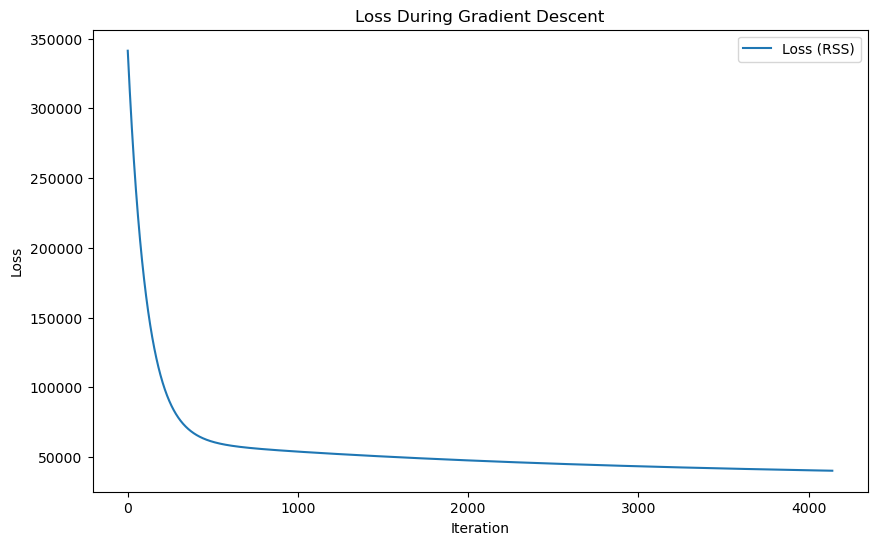

In [6]:
# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Loss (RSS)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Gradient Descent')
plt.legend()
plt.show()

#### Yes, with a sufficiently large number of steps, gradient descent is expected to converge to a solution that is not the same but it is close to the optimal, as evidenced by the loss graph which shows a rapid initial decrease in cost and subsequent stabilization, indicating that the algorithm is approaching an optimal set of parameters.

### c)

In [7]:
w = np.array([1, 1, 1, 1, 1, 1])
b = 10
learning_rate = 0.001
steps = 4140
n_points = len(y)
loss_values = []

for step in range(steps):
    i = step % n_points
    x_i = X_normalized.iloc[i]
    y_i = y.iloc[i]
    y_pred_i = np.dot(w, x_i) + b
    
    loss = (y_i - y_pred_i) ** 2
    loss_values.append(loss) 
    
    gradient_w_i = -2 * x_i * (y_i - y_pred_i)
    gradient_b_i = -2 * (y_i - y_pred_i)
    
    w = w - learning_rate * gradient_w_i
    b = b - learning_rate * gradient_b_i

# Calculate predictions for the entire dataset with final w and b
final_y_pred = X_normalized.dot(w) + b

# Calculate R-squared using final predictions
SSR = ((y - final_y_pred) ** 2).sum()
SST = ((y - y.mean()) ** 2).sum()
r2 = 1 - (SSR / SST)

print("Optimized weights: \n", w, "\n")
print("Optimized Bias: ", b, "\n")
print("R^2: ", r2)


Optimized weights: 
 X1 transaction date                        4.864761
X2 house age                              -2.178003
X3 distance to the nearest MRT station    -5.602656
X4 number of convenience stores           13.009351
X5 latitude                               10.227864
X6 longitude                              11.884743
dtype: float64 

Optimized Bias:  19.62082696362924 

R^2:  0.47510425837864323


For 2(a), $R^2 \approx 0.4750 <  0.4751$. Hence, SGD was slightly better than GD.

The slight improvement of SGD over GD in terms of $R^2$  can be attributed to SGD's ability to better navigate the cost function landscape through its frequent, varied updates, potentially finding a slightly more optimal set of parameters for the given dataset.

### d)

In [8]:
w = np.array([1, 1, 1, 1, 1, 1])
b = 10
learning_rate = 0.001
steps = 4140
n_points = len(y)  

costs = []

for step in range(steps):
    i = step % n_points  
    x_i = np.array(X_normalized.iloc[i]).reshape(1, -1)    
    y_i = y[i]  
    
    y_pred_i = np.dot(x_i, w) + b  
    error_i = y_i - y_pred_i  
    
    cost_i = np.abs(error_i).sum()
    costs.append(cost_i)
    

    subgrad_w = np.sign(y_pred_i - y_i) * x_i 
    subgrad_b = np.sign(y_pred_i - y_i)  
    

    w = w - learning_rate * subgrad_w.flatten()
    b = b - learning_rate * subgrad_b

# After optimization, calculate final predictions
final_y_pred_l1 = np.dot(X_normalized, w) + b

# Compute R-squared for the optimized model
SSR_l1 = ((y - final_y_pred_l1) ** 2).sum()
SST_l1 = ((y - y.mean()) ** 2).sum()
r2_l1 = 1 - (SSR_l1 / SST_l1)

print("Updated weights:", w)
print("Updated bias:", b)
print("R^2 score:", r2_l1)


Updated weights: [3.00745852 2.48712785 1.47364676 2.6724     2.78491881 3.54698879]
Updated bias: [13.778]
R^2 score: -1.424736969733107


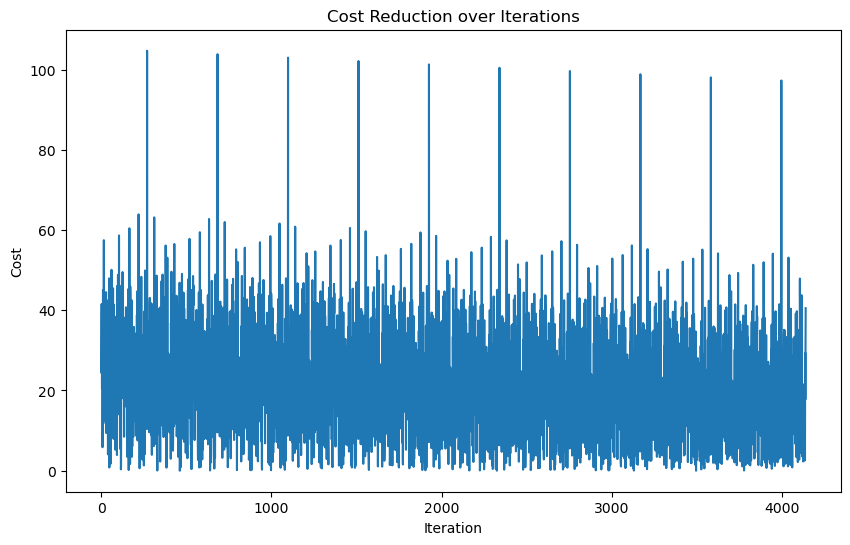

In [9]:
# Plotting the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations')
plt.show()
